In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

data = pd.read_csv("~/Documents/DATASETS/students/KaDo.csv")
df = data.copy()
small_df = data.copy()[:500]
small_df.head()

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281


(7245522, 8) TICKET_ID       int64
MOIS_VENTE      int64
PRIX_NET      float64
FAMILLE        object
UNIVERS        object
MAILLE         object
LIBELLE        object
CLI_ID          int64
dtype: object
HYGIENE            2095077
MAQUILLAGE         1694751
SOINS DU VISAGE    1494034
SOINS DU CORPS      878923
PARFUMAGE           628087
CAPILLAIRES         301365
SOLAIRES            153254
MULTI FAMILLES          30
SANTE NATURELLE          1
Name: FAMILLE, dtype: int64


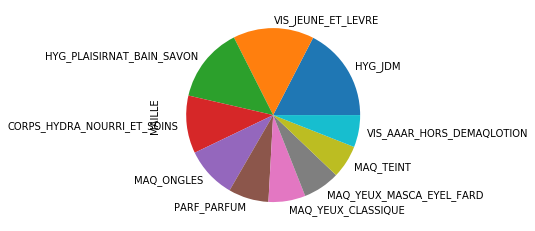

In [3]:
print(df.shape, df.dtypes)

# Manipulation du DF pour constater quelles sont les mailles univers, famille que l'on retrouve le plus
print(df['FAMILLE'].value_counts())
pd.crosstab(df['UNIVERS'], df['MAILLE'], dropna=True)

#pd.value_counts(df['UNIVERS'])[:10].plot.pie()
# Conclusion de la ligne du dessus, un univers est largement devant les autres, donc logiquement,
# plusieurs mailles devraient l'etre devant les mailles d'un autre Univers

#sns.displot(df['MAILLE'][:10], label='Maille')
pd.value_counts(df['MAILLE'])[:10].plot.pie()

In [4]:
small_df.corr()['PRIX_NET']
#sns.clustermap(df['UNIVERS'][:10].corr())
#sns.pairplot(df['UNIVERS'])

TICKET_ID     0.034771
MOIS_VENTE    0.032393
PRIX_NET      1.000000
CLI_ID        0.091705
Name: PRIX_NET, dtype: float64

In [5]:
encoder = LabelEncoder()
small_df['UNIVERS_NUM'] = encoder.fit_transform(small_df['UNIVERS'])
small_df['PRIX_NET'].corr(small_df['UNIVERS_NUM'])

0.3267302090105636

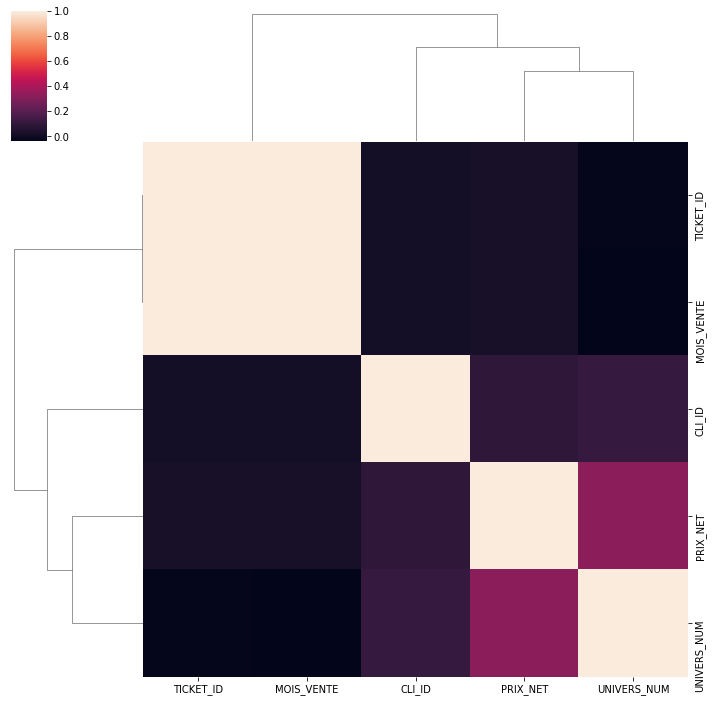

In [6]:
sns.clustermap(small_df[small_df.columns].corr())

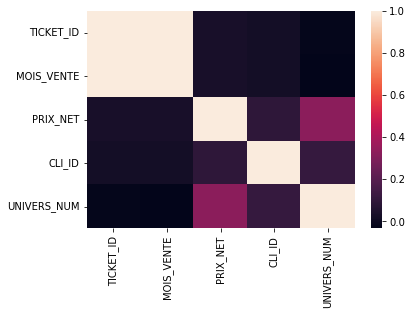

In [7]:
sns.heatmap(small_df[small_df.columns].corr())

In [8]:
#Calcul des clients les plus dépensiers par mois et observation des univers les plus récurrents
months = [month for month in range(1, 13)]
top_clients_df = small_df.copy()

for month in months:
    res = top_clients_df[top_clients_df["MOIS_VENTE"] == month]
    res = res[["MOIS_VENTE", "PRIX_NET", "CLI_ID", "UNIVERS"]]
    # print(res)
    most_recurrent_universes = res[["UNIVERS"]].value_counts()
    # print("UNIVERS most reccurent : ")
    # sns.countplot(data=small_df, x="UNIVERS", order=most_recurrent_universes.index)
    res = res.groupby("CLI_ID")["PRIX_NET"]\
        .sum().sort_values(ascending=False)
    print("Month : ", month, "\n")
    print(res.head(20), "\n")

Month :  1 

CLI_ID
90822328     36.70
362128564    32.70
85841284     29.60
360340862    24.35
336948609    22.95
100064590    19.70
372658871    18.70
131204016    18.50
69813934     14.85
195207210    14.00
20727324     13.25
21239163     12.65
21046542     11.30
100023116     9.60
366515154     7.50
20163348      7.45
21351166      7.40
20200041      6.70
93806295      6.00
243624087     4.45
Name: PRIX_NET, dtype: float64 

Month :  2 

CLI_ID
366515154    41.75
21046542     38.90
356832238    18.80
85841284      9.80
372658871     8.85
195207210     8.45
360340862     7.90
372367788     7.45
275493987     6.90
69813934      6.45
21504227      1.95
Name: PRIX_NET, dtype: float64 

Month :  3 

CLI_ID
90822328     42.80
366515154    25.50
69813934     21.35
359489151    19.45
195207210    17.00
356832238     7.75
20561854      7.05
131204016     2.95
372402389     1.50
Name: PRIX_NET, dtype: float64 

Month :  4 

CLI_ID
365845758    39.95
21497331     33.35
356998310    26.95
1952

In [9]:
# Calcul des mailles les plus onéreuses afin de les proposer aux clients les plus dépensiers

top_expensive = small_df.copy()
top_expensive = top_expensive[["MAILLE", "PRIX_NET"]]\
    .groupby("MAILLE")['PRIX_NET'].mean().sort_values(ascending=False)
print(top_expensive,
      # top_expensive.plot.pie()
      )


MAILLE
PARF_HOMME                     14.333333
PARF_PARFUM                    14.304516
VIS_AAAR_HORS_DEMAQLOTION      13.588235
MAQ_YEUX_MASCA_HG              11.450000
MAQ_TEINT                      10.911538
MAQ_LEV_RAL_HMG                 8.700000
CORPS_SPA_ET_MINCEUR            8.450000
VIS_HOMMES                      8.200000
SOLAIRE                         7.842857
MAQ_YEUX_MASCA_EYEL_FARD        7.465625
MAQ_LEV_BASPRIX                 6.766667
PARF_EDT                        6.756250
VIS_BIO                         6.716667
CORPS_MONOI                     5.950000
VIS_AAAR_DEMAQLOTION            5.685714
MAQ_YEUX_CLASSIQUE              5.375714
VIS_JEUNE_ET_LEVRE              4.707692
CORPS_HYDR_LAIT_HUILE           4.266667
HYG_HOMME                       4.250000
CORPS_HYDRA_NOURRI_ET_SOINS     3.834615
VIS_AUTRES                      3.716667
MAQ_ONGLES                      3.534615
HYG_CULTUREBIO                  3.458333
HYG_MONOI_ET_EDIT_SPEC          3.376923
VIS_PUR  